                        Audio File  System Output  T-Statistic  P-Value
 Rate the stress level for Audio 1              6      -5.1862 0.000007
 Rate the stress level for Audio 2              7      -6.2706 0.000000
 Rate the stress level for Audio 3              6      -0.3864 0.701307
 Rate the stress level for Audio 4              3       1.6287 0.111432
 Rate the stress level for Audio 5              3       2.0000 0.052685
 Rate the stress level for Audio 6              6      -0.5885 0.559575
 Rate the stress level for Audio 7              3       2.0037 0.052087
 Rate the stress level for Audio 8              3       2.5876 0.013505
 Rate the stress level for Audio 9              7      -8.8059 0.000000
Rate the stress level for Audio 10              2       4.6200 0.000041
Rate the stress level for Audio 11              4       5.3835 0.000004
Rate the stress level for Audio 12              7      -5.4502 0.000003


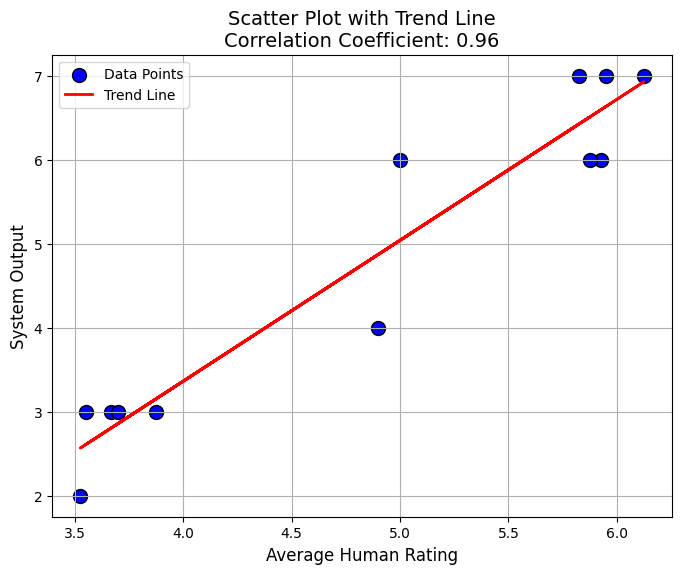

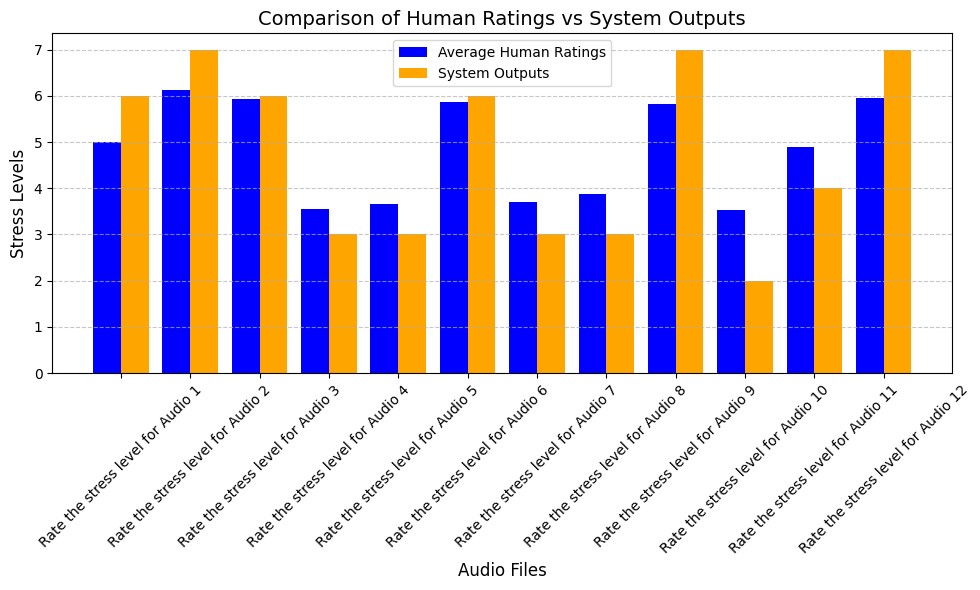

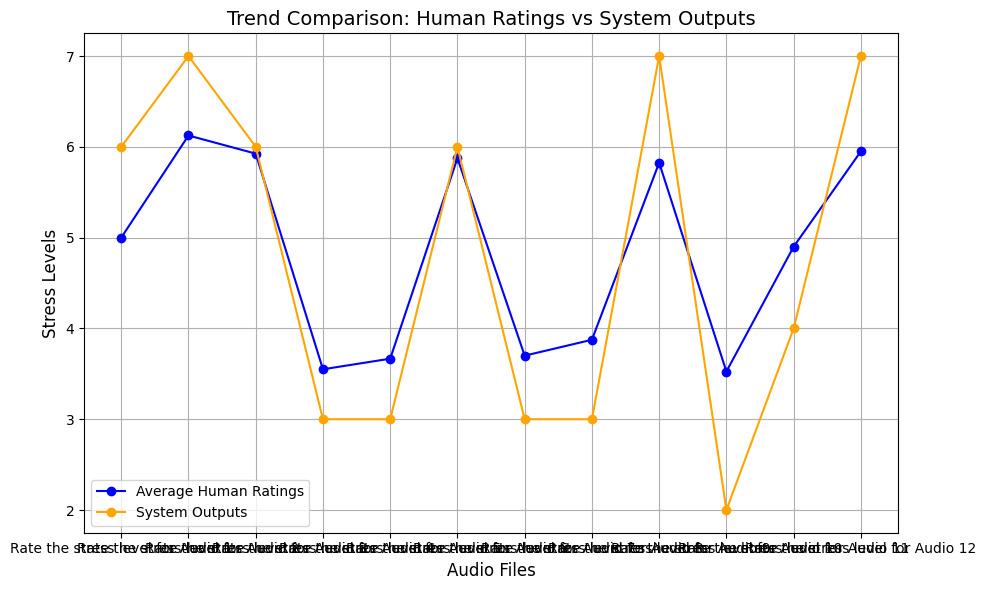

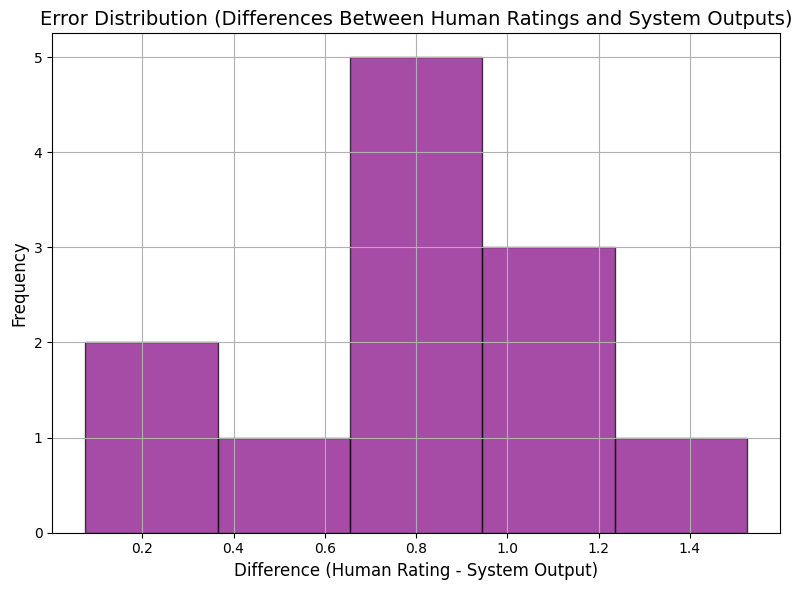

Correlation Coefficient: 0.96
Mean Absolute Error (MAE): 0.79
Paired T-statistic: 0.29, P-value: 0.7793

Summary Table:
                            Audio File  Average Human Rating  System Output  \
0    Rate the stress level for Audio 1              5.000000              6   
1    Rate the stress level for Audio 2              6.125000              7   
2    Rate the stress level for Audio 3              5.925000              6   
3    Rate the stress level for Audio 4              3.550000              3   
4    Rate the stress level for Audio 5              3.666667              3   
5    Rate the stress level for Audio 6              5.875000              6   
6    Rate the stress level for Audio 7              3.700000              3   
7    Rate the stress level for Audio 8              3.875000              3   
8    Rate the stress level for Audio 9              5.825000              7   
9   Rate the stress level for Audio 10              3.525000              2   
10  Rate th

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel, ttest_1samp

# Step 1: Input Data
file_path = "./Untitled form 40.csv"  # Update this to the correct file path
df = pd.read_csv(file_path)
df = df.drop(columns=["Timestamp"])  # Remove unnecessary columns if present

audio_files = df.columns.tolist()
average_human_ratings = df.mean().tolist()
system_outputs = [6, 7, 6, 3, 3, 6, 3, 3, 7, 2, 4, 7]

# Step 2: Calculate Metrics
# Correlation Coefficient
correlation = np.corrcoef(average_human_ratings, system_outputs)[0, 1]

# Differences and Mean Absolute Error (MAE)
differences = [abs(h - s) for h, s in zip(average_human_ratings, system_outputs)]
mae = np.mean(differences)

# Paired T-Test
t_stat, p_value = ttest_rel(average_human_ratings, system_outputs)

# Step 3: One-Sample T-Test for Each Audio File
results = []
for i, col in enumerate(df.columns):
    ratings = df[col].dropna().tolist()  # Convert column to a list of non-NaN values
    t_stat_ind, p_value_ind = ttest_1samp(ratings, system_outputs[i])
    results.append((col, system_outputs[i], t_stat_ind, p_value_ind))

# Display results with better alignment and formatting
results_df = pd.DataFrame(results, columns=["Audio File", "System Output", "T-Statistic", "P-Value"])
results_df["T-Statistic"] = results_df["T-Statistic"].round(4)
results_df["P-Value"] = results_df["P-Value"].apply(lambda x: f"{x:.6f}")

print(results_df.to_string(index=False))

# Step 4: Scatter Plot with Trend Line
plt.figure(figsize=(8, 6))
plt.scatter(average_human_ratings, system_outputs, color='blue', edgecolor='k', s=100, label='Data Points')
z = np.polyfit(average_human_ratings, system_outputs, 1)
p = np.poly1d(z)
plt.plot(average_human_ratings, p(average_human_ratings), color='red', linewidth=2, label='Trend Line')
plt.xlabel("Average Human Rating", fontsize=12)
plt.ylabel("System Output", fontsize=12)
plt.title(f"Scatter Plot with Trend Line\nCorrelation Coefficient: {correlation:.2f}", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Bar Chart (Human Ratings vs System Outputs)
bar_width = 0.4
x = np.arange(len(audio_files))  # Positions for the bars
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, average_human_ratings, width=bar_width, label="Average Human Ratings", color="blue")
plt.bar(x + bar_width/2, system_outputs, width=bar_width, label="System Outputs", color="orange")
plt.xlabel("Audio Files", fontsize=12)
plt.ylabel("Stress Levels", fontsize=12)
plt.title("Comparison of Human Ratings vs System Outputs", fontsize=14)
plt.xticks(x, audio_files, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Step 6: Line Chart for Trends
plt.figure(figsize=(10, 6))
plt.plot(audio_files, average_human_ratings, marker='o', label='Average Human Ratings', color='blue')
plt.plot(audio_files, system_outputs, marker='o', label='System Outputs', color='orange')
plt.xlabel("Audio Files", fontsize=12)
plt.ylabel("Stress Levels", fontsize=12)
plt.title("Trend Comparison: Human Ratings vs System Outputs", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 7: Histogram of Differences
plt.figure(figsize=(8, 6))
plt.hist(differences, bins=5, color='purple', edgecolor='k', alpha=0.7)
plt.xlabel("Difference (Human Rating - System Output)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Error Distribution (Differences Between Human Ratings and System Outputs)", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 8: Print Metrics
print(f"Correlation Coefficient: {correlation:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Paired T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

# Step 9: Summary Table
summary_table = pd.DataFrame({
    "Audio File": audio_files,
    "Average Human Rating": average_human_ratings,
    "System Output": system_outputs,
    "Difference": differences
})
print("\nSummary Table:")
print(summary_table)
